# Fashion MNIST

## Imports

In [147]:
import tensorflow as tf
import numpy as np
from random import randint
import matplotlib.pyplot as plt

## Loading data

In [148]:
fmnist = tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = fmnist.load_data()

### Normalization

In [149]:
print(len(X_train))
print(len(y_train))

60000
60000


In [150]:
X_train = X_train / 255
X_test = X_test / 255

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.00392157 0.00392157 0.         0.
  0.08235294 0.1254902  0.09411765 0.10980392 0.         0.
  0.         0.         0.         0.         0.00392157 0.00392157
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.00392157 0.         0.         0.
  0.69803922 0.50588235 0.58039216 0.4745098  0.21960784 0.
  0.         0.         0.00392157 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.97254902 1.         0.88235294 0.63529412 0.46666667 0.29019608
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.01176471 0.15294118 0.25882353 0.37254902 0.3176

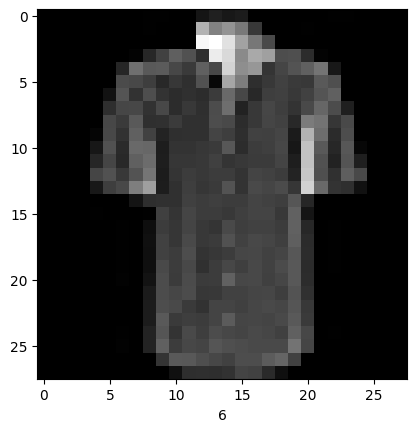

In [151]:
idx = randint(0,len(X_train))
rand_image = X_train[idx]
print(rand_image)

plt.xlabel(y_train[idx])
plt.imshow(rand_image, cmap='gray')

## Declaring model

In [138]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
])

In [139]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

## Model training

In [140]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4651 - accuracy: 0.8331
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3583 - accuracy: 0.8689
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3198 - accuracy: 0.8848
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2969 - accuracy: 0.8900
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2782 - accuracy: 0.8960
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2637 - accuracy: 0.9012
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2496 - accuracy: 0.9072
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2394 - accuracy: 0.9097
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2305 - accuracy: 0.9129
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.218

## Model testing

In [141]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print('TEST LOSS:', test_loss)
print('TEST ACCURACY:', test_accuracy)

313/313 [==============================] - 0s 991us/step - loss: 0.6062 - accuracy: 0.8949
TEST LOSS: 0.6061546206474304
TEST ACCURACY: 0.8949000239372253


## Model prediction

1/1 [==============================] - 0s 32ms/step
[[1.2412436e-38 0.0000000e+00 3.6975430e-34 0.0000000e+00 1.3554801e-33
  1.0000000e+00 1.4445991e-38 7.0405895e-35 2.7321853e-27 0.0000000e+00]]


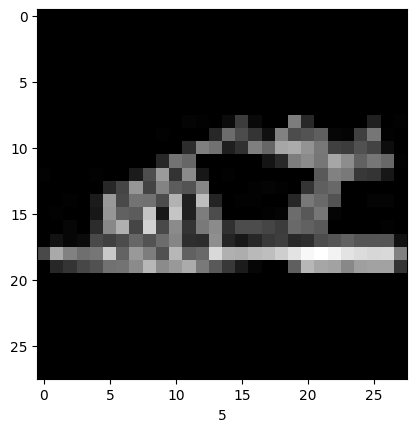

In [142]:
idx = randint(0,len(X_test))
rand_test_image = X_test[idx]

prediction = model.predict(rand_test_image.reshape(1,-1))
lbl = np.argmax(prediction[0])
print(prediction)
plt.xlabel(lbl)
plt.imshow(rand_test_image,cmap='gray')

## Adding callbacks

In [157]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
])

In [158]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [159]:
class Finish_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs['accuracy'] >= 0.95):
            print('\nCancelling training at epoch', epoch)
            self.model.stop_training = True

In [160]:
myCallback = Finish_callback()

In [161]:
model.fit(X_train,y_train, epochs=50, callbacks=[myCallback])

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4702 - accuracy: 0.8321
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3579 - accuracy: 0.8691
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3219 - accuracy: 0.8809
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2992 - accuracy: 0.8892
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2780 - accuracy: 0.8954
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2645 - accuracy: 0.9015
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2519 - accuracy: 0.9057
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2406 - accuracy: 0.9087
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2292 - accuracy: 0.9144
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.221

The above code runs for 1 extra step becuase we have called the callback function on 'on_epoch_end' ie. code runs for 1 more epoch to check if accuracy has really dropped below desired value

In [162]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 782us/step - loss: 0.4270 - accuracy: 0.8920


[0.42697274684906006, 0.8920000195503235]

1/1 [==============================] - 0s 12ms/step
Actual label 7


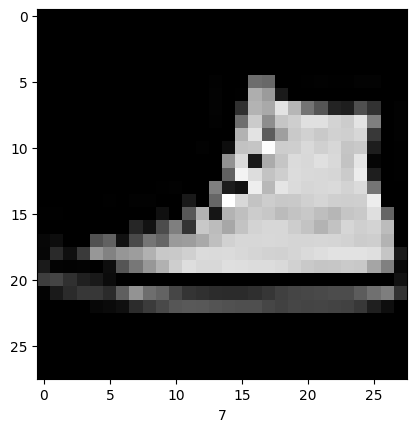

In [170]:
idx = randint(0,len(X_test))
rand_img = X_test[idx]
rand_lbl = y_test[idx]

pre = model.predict(rand_img.reshape(1,-1))
predict_lbl = np.argmax(pre)

plt.xlabel(predict_lbl)
plt.imshow(rand_img,cmap='gray')
print('Actual label',rand_lbl)